In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc,html
import folium
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier

In [2]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv')
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


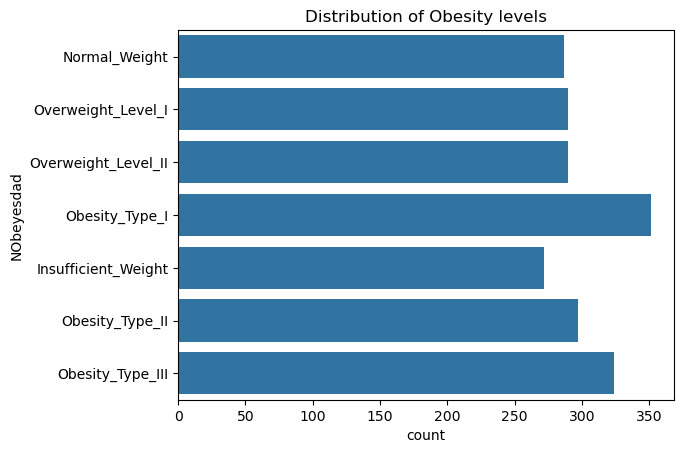

In [3]:
sns.countplot(data=df,y='NObeyesdad')
plt.title('Distribution of Obesity levels')
plt.show()

In [4]:
df.isna().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [5]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df.shape

(2111, 17)

In [9]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [12]:
continuous_columns=df.select_dtypes(include=['float64']).columns.tolist()
continuous_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [13]:
ss=StandardScaler()
scaled_features=ss.fit_transform(df[continuous_columns])
scaled_features[0:5]

array([[-0.52212439, -0.87558934, -0.86255819, -0.7850187 ,  0.40415272,
        -0.01307326, -1.18803911,  0.56199675],
       [-0.52212439, -1.94759928, -1.16807699,  1.08834176,  0.40415272,
         1.61875854,  2.33975012, -1.08062463],
       [-0.20688898,  1.05402854, -0.36609013, -0.7850187 ,  0.40415272,
        -0.01307326,  1.16382038,  0.56199675],
       [ 0.42358183,  1.05402854,  0.01580838,  1.08834176,  0.40415272,
        -0.01307326,  1.16382038, -1.08062463],
       [-0.36450668,  0.83962655,  0.12273996, -0.7850187 , -2.16702273,
        -0.01307326, -1.18803911, -1.08062463]])

In [14]:
scaled_data=pd.DataFrame(scaled_features,columns=ss.get_feature_names_out(continuous_columns))
scaled_df=pd.concat([df.drop(columns=continuous_columns),scaled_df],axis=1)

NameError: name 'scaled_df' is not defined

In [ ]:
scaled_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [ ]:
scaled_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [ ]:
categorical_columns=scaled_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
categorical_columns.remove('NObeyesdad')

In [ ]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
encoded_features=ohe.fit_transform(scaled_df[categorical_columns])
print(encoded_features[0:5])

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]


In [ ]:
encoded_data=pd.DataFrame(encoded_features,columns=ohe.get_feature_names_out(categorical_columns))
encoded_data

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
encoded_df=pd.concat([scaled_df.drop(columns=categorical_columns),encoded_data],axis=1)

In [ ]:
encoded_df

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
encoded_df.columns

Index(['NObeyesdad', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
encoded_df['Nobeyesdad']=encoded_df['NObeyesdad'].astype('category').cat.codes
encoded_df.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Nobeyesdad
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6


In [ ]:
x=encoded_df.drop('NObeyesdad',axis=1)
y=encoded_df['NObeyesdad']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
model_ova=LogisticRegression(multi_class='ovr',max_iter=1000)
model_ova.fit(x_train,y_train)

/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
y_pred_ova=model_ova.predict(x_test)
print('One-vs-All (OvA) Strategy')
print(f"Accuracy: {np.round(100*accuracy_score(y_test,y_pred_ova),2)}%")


One-vs-All (OvA) Strategy
Accuracy: 95.98%


In [ ]:
model_ovo=OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(x_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred_ovo=model_ovo.predict(x_test)
y_pred_ovo

array(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Overweight_Level_I', 'Insufficient_Weight', 'Normal_Weight',
       'Obesity_Type_III', 'Overweight_Level_I', 'Normal_Weight',
       'Overweight_Level_I', 'Obesity_Type_I', 'Obesity_Type_I',
       'Overweight_Level_II', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_II', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_III', 'Overweight_Level_II', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_I',
       'Overweight_Level_I', 'Obesity_Type_III', 'Normal_Weight',
       'Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_III',
       'Insufficient_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_III', 'Overweight_L

In [ ]:
# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 100.0%


In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)


In [ ]:
model_ova1=LogisticRegression(multi_class='ovr',max_iter=1000)
model_ova1.fit(x_train,y_train)

/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
model_ovo1=OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo1.fit(x_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
print(model_ova1.coef_)
print('Intercept:',model_ova1.intercept_)

[[-3.41434682e-01  6.22994091e-01 -2.27315748e+00  1.94850732e-01
   9.83491995e-02  7.40015964e-02 -4.07713705e-02  1.15653335e-01
  -2.76372921e-01 -1.10796543e-01 -1.27444387e-04  4.13153034e-01
   2.23565607e-01  1.71446081e-02 -2.01307929e-01 -7.85629021e-02
  -1.73518249e-01  1.23006227e-01  1.88432247e-01 -9.42202974e-02
  -5.83645270e-02  2.02336988e-01 -2.17511535e-01 -5.91706441e+00]
 [-1.35843593e-01 -3.62336704e-01 -6.71930183e-01 -2.13332197e-01
  -5.45036921e-02 -2.26389783e-01  2.10293002e-01 -1.93470723e-01
   1.10791874e+00 -6.00291192e-02 -1.79059219e-01 -1.24082582e+00
  -1.62056113e+00 -9.33404973e-01  9.60042947e-01  3.71193361e-01
   8.40703839e-01 -3.84324853e-01 -4.34426467e-01  1.18082394e+00
   9.69035013e-01 -1.67485227e-01  1.62896176e+00 -5.76504960e-01]
 [ 3.46911892e-01 -1.89052923e+00  5.05234604e+00 -7.28142409e-01
  -4.95952536e-01  3.37980123e-01 -5.22789454e-02 -1.36220511e-01
  -6.49659149e-01  3.03191202e+00  1.24254778e+00 -1.85572571e+00
   1.216

In [ ]:
y_hat_ova1=model_ova1.predict(x_test)
y_hat_ovo1=model_ovo1.predict(x_test)
print(100*accuracy_score(y_test,y_hat_ova1))
print(100*accuracy_score(y_test,y_hat_ovo1))

95.98108747044918
100.0


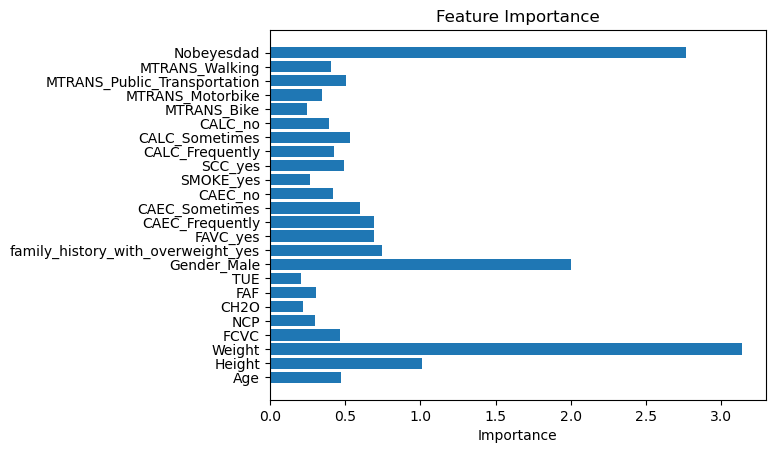

In [ ]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(x.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [ ]:


def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

